In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("bottle.csv")

/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.shape

(864863, 74)

In [5]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_data = data.loc[:,'Depthm':'O2Satq']

In [7]:
df2 = data.loc[:,'R_PRES']
df2.head()

0     0
1     8
2    10
3    19
4    20
Name: R_PRES, dtype: int64

In [8]:
num_data['R_PRES'] = df2

In [9]:
num_data.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,20


In [10]:
num_data.drop(['Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'O2Satq',  'P_qual','O_qual','SThtaq','O2Sat'], axis= 1, inplace= True)

In [11]:
num_data

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
0,0,10.500,33.4400,NaN,25.64900,0
1,8,10.460,33.4400,NaN,25.65600,8
2,10,10.460,33.4370,NaN,25.65400,10
3,19,10.450,33.4200,NaN,25.64300,19
4,20,10.450,33.4210,NaN,25.64300,20
...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,0
864859,2,18.744,33.4083,5.805,23.87072,2
864860,5,18.692,33.4150,5.796,23.88911,5
864861,10,18.161,33.4062,5.816,24.01426,10


In [12]:
num_data.isnull().sum()

Depthm         0
T_degC     10963
Salnty     47354
O2ml_L    168662
STheta     52689
R_PRES         0
dtype: int64

/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

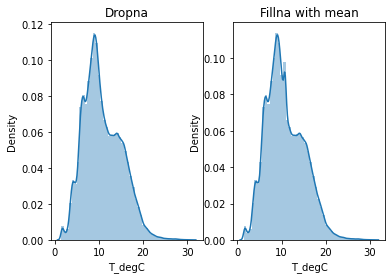

In [13]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.T_degC.fillna(num_data.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

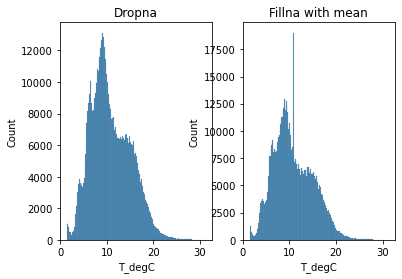

In [14]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.T_degC.fillna(num_data.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [15]:
#decide to drop missing values for the temperature variable, to avoid spike by plugging in mean
num_data = num_data[num_data['T_degC'].notna()]
#decide to drop missing values from salinity variable, as it's dependent we don't care abt missing values
num_data = num_data[num_data['Salnty'].notna()]


In [16]:
num_data.isnull().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L    152758
STheta      2073
R_PRES         0
dtype: int64

/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

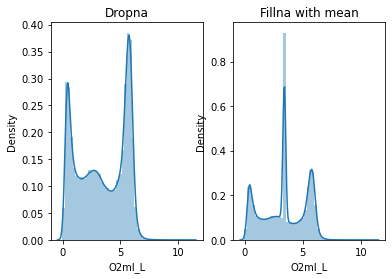

In [17]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.O2ml_L.fillna(num_data.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

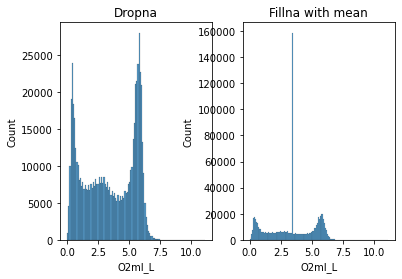

In [18]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.O2ml_L.fillna(num_data.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [19]:
#decide to drop to avoid spike for O2ml_L variable
num_data = num_data[num_data['O2ml_L'].notna()]

/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nbirova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

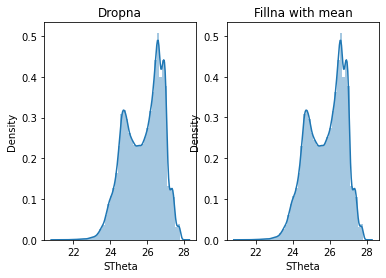

In [20]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.STheta.fillna(num_data.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

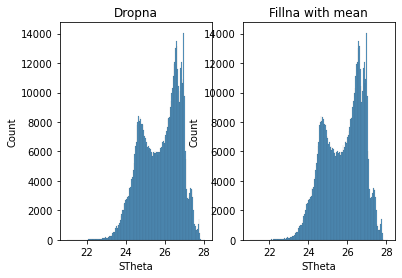

In [21]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.STheta.fillna(num_data.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [22]:
#decide to fill in with mean as there is no spike to avoid
num_data['STheta'] = num_data['STheta'].fillna(num_data['STheta'].mean())

In [23]:
num_data.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
O2ml_L    0
STheta    0
R_PRES    0
dtype: int64

In [24]:
split = (np.random.rand(len(num_data)) <= 0.8)
training = num_data[split]
testing = num_data[~split]

print(f"No. of training examples: {training.shape[0]}")
print(f"No. of testing examples: {testing.shape[0]}")

No. of training examples: 529212
No. of testing examples: 132277


In [25]:
training.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
count,529212.000000,529212.000000,529212.000000,529212.000000,529212.000000,529212.000000
mean,219.731578,10.920918,33.832880,3.415953,25.797460,221.208797
std,310.706824,4.229458,0.460544,2.069628,1.010330,314.090588
min,0.000000,1.440000,29.402000,-0.010000,20.996000,0.000000
25%,49.000000,7.800000,33.479000,1.400000,24.940000,49.000000
50%,125.000000,10.160000,33.854000,3.470000,25.971315,126.000000
75%,300.000000,14.020000,34.185000,5.511000,26.633857,302.000000
max,5351.000000,31.140000,37.034000,10.690000,28.049000,5458.000000


In [26]:
testing.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
count,132277.000000,132277.000000,132277.000000,132277.000000,132277.000000,132277.000000
mean,219.503020,10.910405,33.831891,3.419709,25.799569,220.984018
std,312.920752,4.206501,0.459540,2.065104,1.005878,316.378362
min,0.000000,1.440000,29.402000,0.000000,21.445000,0.000000
25%,49.000000,7.810000,33.480000,1.418000,24.947000,49.000000
50%,125.000000,10.150000,33.852000,3.480000,25.970750,126.000000
75%,300.000000,14.009000,34.181000,5.520000,26.633000,301.000000
max,5351.000000,30.760000,36.631000,11.130000,28.083000,5458.000000


<AxesSubplot:>

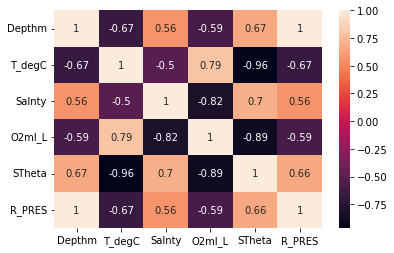

In [27]:
sns.heatmap(training.corr(), annot= True)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for j in range(len(training.columns)):
    vif_data = pd.DataFrame()
    vif_data["feature"] = training.columns
    vif_data["VIF"] = [variance_inflation_factor(training.values, i) for i in range(len(training.columns))]
    vif_data = vif_data.sort_values(by= 'VIF', ascending= False)
    if(vif_data.VIF.max() < 30):
        df_bottle_train_scaled = training.drop(vif_data.feature[1], axis= 1)
        vif_data = vif_data.drop(['feature', 'VIF'], axis= 1)
        vif_data.reset_index(drop= True, inplace= True)
    else:
        print(vif_data)
        break

  feature            VIF
0  Depthm  224898.670369
5  R_PRES  222897.949388
2  Salnty  145009.230204
4  STheta  121567.933771
1  T_degC    1227.113321
3  O2ml_L      15.543176


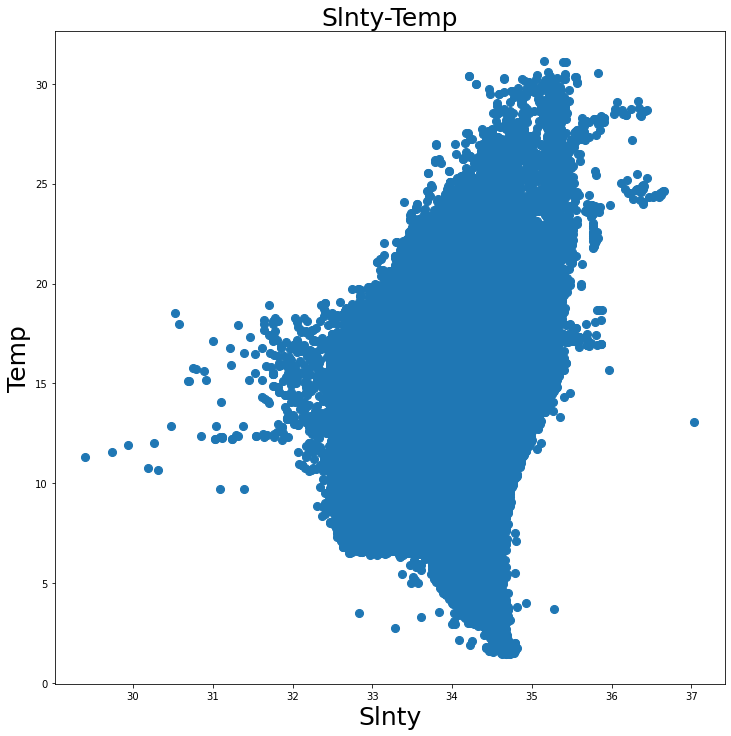

In [29]:
#### nicole's regression models


plt.figure(figsize=(12, 12))
plt.scatter(training["Salnty"], training["T_degC"],s=65)
plt.xlabel('Slnty',fontsize=25)
plt.ylabel('Temp',fontsize=25)
plt.title('Slnty-Temp',fontsize=25)
plt.show()

In [30]:
new = training[:][:750]
len(new)

750

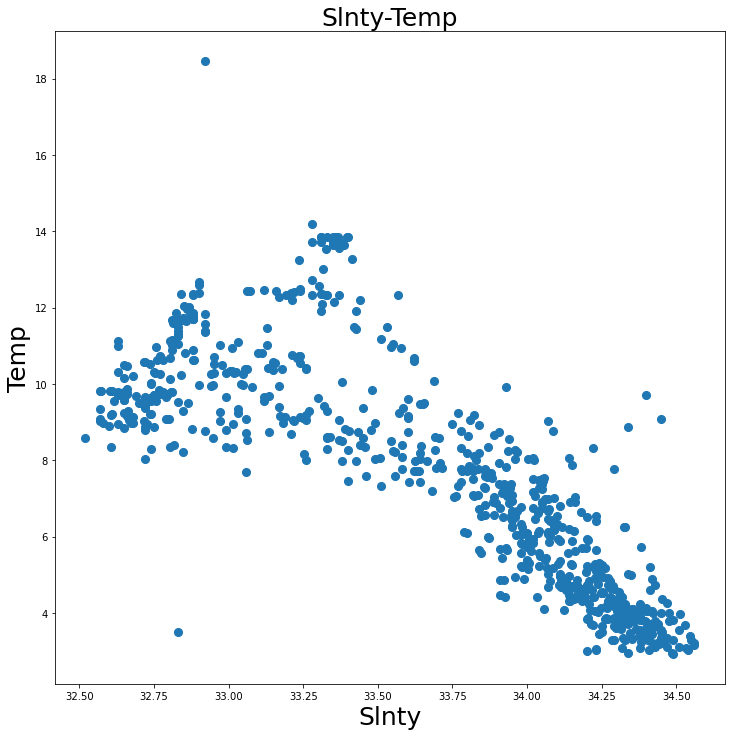

In [31]:
plt.figure(figsize=(12, 12))
plt.scatter(new["Salnty"], new["T_degC"],s=65)
plt.xlabel('Slnty',fontsize=25)
plt.ylabel('Temp',fontsize=25)
plt.title('Slnty-Temp',fontsize=25)
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression 
Slt = new.iloc[:, 0:1].values  
Tmp = new.iloc[:, -1].values  
lin_reg=LinearRegression()
lin_reg.fit(Slt,Tmp)

LinearRegression()

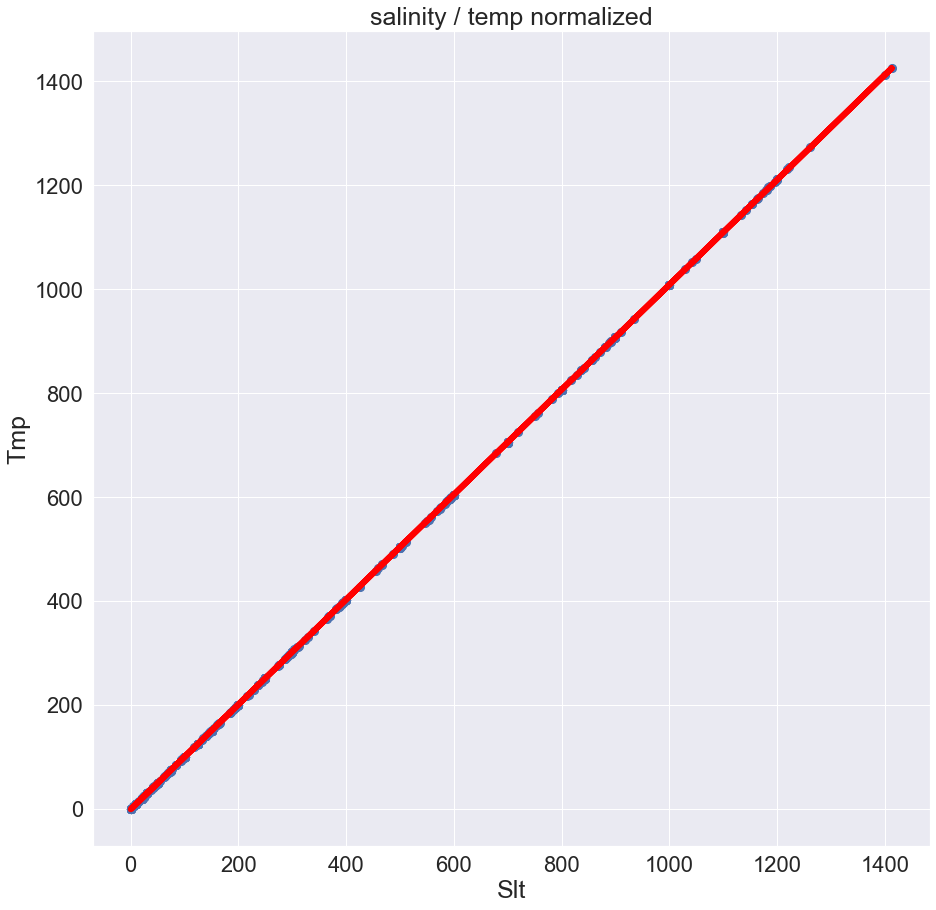

In [33]:
sns.set(font_scale=2)
plt.figure(figsize=(15, 15))
plt.scatter(Slt,Tmp,s=65)
plt.plot(Slt,lin_reg.predict(Slt), color='red', linewidth='6')
plt.xlabel('Slt',fontsize=25)
plt.ylabel('Tmp',fontsize=25)
plt.title('salinity / temp normalized',fontsize=25)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
Tmp_head_lin=lin_reg.predict(Slt)
print("Linear Regression R_Square Score: " ,r2_score(Tmp,Tmp_head_lin))
#["Linear Regression R_Square Score:"]=r2_score(Tmp,Tmp_head_lin)

Linear Regression R_Square Score:  0.9999986820981842


In [35]:
training.shape

(529212, 6)

In [36]:
training.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
2161,6,18.46,32.920,6.02,23.568,6
2162,10,10.29,32.951,6.04,25.304,10
2163,15,10.29,32.990,6.06,25.335,15
2164,20,10.33,33.005,6.04,25.339,20
2165,30,10.39,33.054,6.01,25.368,30


In [37]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
ols_object = smf.ols(formula = 'T_degC~STheta', data = training)

In [38]:
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 T_degC   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 6.947e+06
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:42:33   Log-Likelihood:            -8.1339e+05
No. Observations:              529212   AIC:                         1.627e+06
Df Residuals:                  529210   BIC:                         1.627e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.0222      0.040   2909.944      0.000     114.945     115.100
STheta        -4.0353      0.002  -2635.675      0.000      -4.038      -4.032
==============================================================================
Omnibus:                   151734.905   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           826943.954
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                       8.566   Cond. No.                         661.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""